
## FINANCIAL ECONOMETRICS
MODULE 6 | LESSON 4

---

# **VECTOR ERROR CORRECTION MODEL AND JOHANSEN TEST FOR COINTEGRATION**

|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Cointegration for two time series, Error Correction Model  |
|**Keywords** |Integrated Time Series, Vector Error Correction Model (VECM), Johansen Test, Trace Test, Maximum Eigenvalue Test  |


---

*In last lesson, we discussed the cointegration test for two time series. We also introduced Error Correction Model (ECM). In this lesson, we will look into a cointegration test for more than two time series. First, we will review the cointegration concept with more than two time series. Then, we will introduce the vector error correction model (VECM) as this is the model structure used for multivariate cointegration analysis. Next, we will introduce Johansen cointegration test for more than two time series.*

In [ ]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
from arch.unitroot import ADF
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
# Download datasets
forex = pd.read_csv("../M6. forex_1.csv")

# Convert date variable to date format
forex["Date2"] = pd.to_datetime(forex["Date"], format="%m/%d/%Y")
forex = forex.loc[:, ["Date2", "AUDUSD", "NZDUSD", "USDCAD"]].set_index("Date2")

## **1. Cointegration with More Than Two Time Series**

First, let’s review the concept of cointegration in the case of multiple time series. An integrated time series of order $d$ can be written as $I(d)$. When we take the difference $d$ times, this series will turn into a stationary, $I(0), $ series. In this lesson, we will only deal with integrated time series of $I(1)$.

Assume we have three $I(1) $ time series, $x_t $, $y_t $ and $z_t $. If there exists a linear combination:

$$ \beta_1 x_t+\beta_2 y_t+\beta_3 z_t \equiv \beta'W_t $$  

that is stationary or $I(0)$, where $\beta$ is a $3\times 1 $ vector with $\beta_1$, $\beta_2$ and $\beta_3 $ as its elements and  $W_t$ is a $3\times 1 $ vector with $x_t $, $y_t $ and $z_t $ as elements.

Then, we say that $x_t$, $y_t$ and $x_t$ are cointegrated. 


## **2. Vector Error Correction Model (VECM)**

Vector error correlation models are related to vector autoregressive models (VARs) introduced in Module 6, Lesson 2. If we have three time series, $x_t$, $y_t$ and $z_t$, we can write the VAR(1) model with these three time series as follows:

$$ \begin{align*}
  x_t &= \alpha_0 + \alpha_1 x_{t-1} + \alpha_2 y_{t-1} + \alpha_3 z_{t-1} + u_t \\
  y_t &= \beta_0 + \beta_1 x_{t-1} + \beta_2 y_{t-1} + \beta_3 z_{t-1} + v_t \\
  z_t &= \gamma_0 + \gamma_1 x_{t-1} + \gamma_2 y_{t-1} + \gamma_3 z_{t-1} + w_t
\end{align*} $$


Where $u_t$, $v_t$ and $w_t$ are white noise with $0$ mean and constant variance.

Let’s rewrite the VAR(1) model above in matrix form as follows: 

$$ X_t = C_0 + \Pi_0 X_{t-1} + \epsilon_t $$

Where $C_0$ is a $3 \times 1$ constant vector: 

$$ C_0 = \begin{bmatrix}
  \alpha_0 \\
  \beta_0 \\
  \gamma_0
\end{bmatrix} $$

$X_t$ is a $3 \times 1$ vector: 

$$ X_t = \begin{bmatrix}
  x_t \\
  y_t\\
  z_t
\end{bmatrix} $$

$\Pi_0$ is a $3 \times 3$ matrix: 

$$ \Pi_0 = \begin{bmatrix}
  \alpha_1 & \alpha_2 & \alpha_3 \\
  \beta_1 & \beta_2 & \beta_3 \\
  \gamma_1 & \gamma_2 & \gamma_3 
\end{bmatrix} $$

$\epsilon_t$ is a $3 \times 1$ white noise vector: 

$$ \begin{bmatrix}
  u_t \\
  v_t \\
  w_t
\end{bmatrix} $$

We know if $x_t$, $y_t$ and $z_t$ are all stationary, we can use the above VAR(1) model. 

On the other hand, when they are not stationary, but their first differences are stationary, then we can use their first differences to model them as a VAR(1). The matrix form of the model can be written as follows:

$$ \Delta X_t = C_1 + \Pi_1 \Delta X_{t-1} + \epsilon_t $$

If $x_t$, $y_t$ and $z_t$ are not stationary but they are cointegrated, then we can adjust the above model with an error correction term. This adjusted model is called a vector error correction model (VECM). We can write the matrix form of a VEC model as follows:

$$ \Delta X_t = C + \Pi X_{t-1} + \Gamma \Delta X_{t-1} + \epsilon_t $$

In general, we need more than one lag for the difference term on the right-hand side of the equation system. We will discuss later how to find the right number of lags in the system. For now, let’s assume the number of lags to be p. Hence, we can write our general VEC model as follows:

$$ \Delta X_t = C + \Pi X_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta X_{t-i} + \epsilon_t $$

Where 

> $C$ is the deterministic vector or matrix depending if there are constants and/or linear trend <br>
> $\Pi$ is a 3X3 matrix for coefficients of lagged $X_{t-1}$ vector <br>
> $\Gamma_i$ is a  3X3 matrix for coefficients of lagged differences of $X$ <br>
> $\epsilon_t$ is a white noise 3X1 vector with $0$ means and stable covariance <br>


The above VEC model was introduced by Johansen. The major difference between a VEC model and VAR model is the new term $\Pi X_{t-1}$ in the VEC model. $\Pi X_{t-1}$ is the error correction term for a VEC model. This error correction term in a VEC model is the long-term equilibrium part of the model. $\sum_{i=1}^{p-1}\Gamma_i\Delta X_{t-i}$ is the short-term movement part of the VEC model. Hence, VEC model can be used to analyze both long-term and short-term dynamics of cointegrated nonstationary $I(1)$ time series variables. We still assume $x_t$, $y_t$ and $z_t$ are $I(1)$.

Let’s focus on the coefficient matrix $\Pi$ for now. We can interpret $\Pi$ as following three scenarios:

**a. The rank of $\Pi$ is $0$**

If $\Pi = 0$, that is all elements of $\Pi$ are $0$, or the rank of $\Pi$ is $0$, then there are no cointegrations among $x_t$, $y_t$ and $z_t$. If all time series are $I(1)$, the VECM will reduce to a VAR($p$) model with the first differences of all time series.

**b. The rank of $\Pi$ is full rank $K$**

If $\Pi$ has full rank $K$, (the diagonal elements of the matrix are all non-zero, in our case, $K= 3$, because we have 3 time series), then $x_t$, $y_t$ and $z_t$ are stationary. There are no unit roots from all time series. We can apply the original levels of these time series to a VAR($p$) model with no need to use a VEC model. This situation should not happen as we usually assume $x_t$, $y_t$, and $z_t$ are $I(1)$.

**c. The rank of $\Pi$ is between $0$ and $K$**

If the rank of $\Pi$ is $m$ and $0 < m < K $, it means $\Pi$ has reduced rank. This is the case with cointegration. $\Pi$ can be split into two terms as follows:

$$ \Pi = \alpha \beta' $$

Where $\Pi$ is a $K \times K$ matrix, $\alpha$ is a $K \times m$ matrix, and $\beta$ is a $K \times m$ matrix.

The columns of $\beta$ matrix contain the $m$ co-integrating vectors, and the columns of $\alpha$ contain the m adjustment vectors. $Rank(\Pi) = Rank(\alpha) = Rank(\beta) =m$. Co-integrating vectors include coefficients of a linear combination of co-integrating time series. There are $m$ linear combinations from all time series that are stationary. Hence, there are $(k-m)$ unit roots from all time series.

Adjustment vectors contain the coefficients that can bring the short-term deviation of the time series back to their long-term equilibrium relationship. The coefficients in adjustment vectors are error correction coefficients. Therefore, $\Pi$ corrects the error gap that happened in the last period and brings short-term disequilibrium among time series back to their long-term equilibrium. 

Now we know that when we have multiple non-stationary co-integrating time series, we should use a VEC model. However, how do we test multiple non-stationary time series for cointegration? This will be the topic of our next section.



## **3. Johansen Cointegration Test**

There are two types of sequential tests proposed by Johansen to test cointegration for multiple time series: trace test and maximum eigenvalue test. They are both likelihood-ratio tests. Both tests run a series of tests on the rank of $\Pi$ we discussed in the last section to decide the number of cointegration relationships in a time series vector.  These two tests have the same null hypothesis. The difference is the alternative hypothesis. Let’s use the following example to explain how the two tests work.


**Figure 1: Johansen Tests: Trace Test and Eigenvalue Test Demonstration**

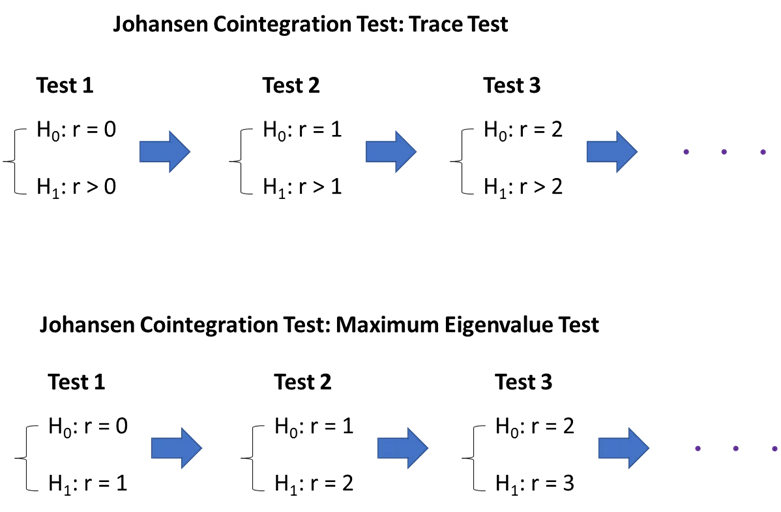


In figure 1, we show the hypothesis test setup for trace test and maximum eigenvalue test. $r$ is the rank of $\Pi$. We can see both null hypotheses start from rank = $0$, i.e., there is no cointegration. If we reject test 1, we move on to test 2. If we reject test 2, we move on to test 3 until we cannot reject null hypothesis or until we reach $K-1$ rank. $K$ is the total number of time series in the time series vector for testing. Once we stop, we can decide what the rank is and how many linear combinations or co-integrating relationships exist. 

In the next section, we will use three foreign exchange rates to demonstrate Johansen tests to identify a number of co-integrating relationships in the three foreign exchange rates.


## **4. Johansen Test Application: AUDUSD, NZDUSD, and CADUSD**

In this section, we will use what we learned from last section to find the number of co-integrating relationships among AUDUSD, NZDUSD, and CADUSD foreign exchange rates from 2016 to 2021. In this example, we will use software to conduct the test. Let’s draw the time plot of the three time series first. 


**Figure 2: AUDUSD, NZDUSD, and CADUSD Foreign Exchange Rates Time Plot from 2016 to 2021**


In [ ]:
# AUDUSD, NZDUSD, and CADUSD Foreign Exchange Rates Time Plot
plt.plot(forex.AUDUSD, linewidth=1, c="g", label="AUDUSD")
plt.plot(forex.NZDUSD, linewidth=1, c="r", label="NZDUSD")
plt.plot(1 / forex.USDCAD, linewidth=1, c="b", label="USDCAD")  # 1/USDCAD=CADUSD
plt.xlabel("Time")
plt.ylabel("NZDUSD & AUDUSD & USDCAD Forex Rates")
plt.legend()
plt.show()

In figure 2, we can see all three time series seem to move together. Before running a cointegration test, we would like to check CADUSD to see if it is stationary. Let’s run ADF on CADUSD.


**Figure 3: Augmented Dickey Fuller Test for CADUSD and First Difference of CADUSD**


In [ ]:
# Augmented Dickey Fuller Test for CADUSD and First Difference of CADUSD
CADUSD_adf = ADF(1 / forex.USDCAD, trend="n", method="bic")
print(
    "CADUSD Augmented Dickey-Fuller Unit Root Test\n", CADUSD_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", CADUSD_adf)

print("\n", "# " * 39, "\n")
CADUSD_d_adf = ADF((1 / forex.USDCAD).diff().dropna(), trend="n", method="bic")
print(
    "First Difference of CADUSD Augmented Dickey-Fuller Unit Root Test\n",
    CADUSD_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", CADUSD_d_adf)

From figure 3, we can see that the CADUSD level has a unit root whereas the CADUSD first difference is stationary. Hence, we can say CADUSD is $I(1)$. Now, we can proceed to conduct a Johansen test for cointegration. We will use a trace test in this example. 

As we discussed in the last section, we need to decide the number of lags in the VEC model before we can use it to test cointegration. In the last lesson, we know R has the function to select the number of lags for a VAR model. We will use this function for our case. 


**Figure 4: Selection of Number of Lags for VEC Model**


In [ ]:
# Selection of Number of Lags for VEC Model
vecm_data = pd.concat(
    [forex.AUDUSD, forex.NZDUSD, 1 / forex.USDCAD.rename("CADUSD")], axis=1
)

# Fit VAR model and run lag selection tool
model = VAR(vecm_data)
x = model.select_order(maxlags=7, trend="c")
x.summary()

From figure 4, we can see all the information criteria select lag 1 for the level of the VAR model. 

Now let's check Johansen trace test results. 


**Figure 5: Johansen Trace Test Result for AUDUSD, NZDUSD, and CADUSD**


In [ ]:
# Johansen Trace Test Result for AUDUSD, NZDUSD, and CADUSD

jtest = coint_johansen(vecm_data, det_order=0, k_ar_diff=1)

# Print the results
print(f"Eigenvalues of VECM coefficient matrix : {jtest.eig}\n")

pd.DataFrame(
    {
        "Test statistic": jtest.trace_stat,
        "Critical values (90%)": jtest.trace_stat_crit_vals[:, 0],
        "Critical values (95%)": jtest.trace_stat_crit_vals[:, 1],
        "Critical values (99%)": jtest.trace_stat_crit_vals[:, 2],
    },
    index=["rank=0", "rank<=1", "rank<=2"],
)

In [ ]:
# VECM model
vecm_model = VECM(endog=vecm_data, k_ar_diff=1, deterministic="ci").fit()
print(vecm_model.summary())

Figure 5 shows the result of the Johansen trace test. The top part in Figure 5 shows the result for three tests: $H_0$: rank = $0$, $H_0$: rank = $1$, and $H_0$: rank = $2$. Let’s use 5% as our decision point. For $H_0$: rank = $0$ we can see the test statistic is 34.913 and the 5% critical value is 29.796. We reject $H_0$ and say the rank is not $0$ or a cointegration relationship would exist. Next, we investigate $H_0$: rank = $1$. The test statistic is 17.588 and the 5% critical value is 15.494. Hence, we cannot reject $H_0$: rank = $1$. There is one linear combination of three time series variables that is stationary. The coefficients of the linear combination are in the second part under '*Cointegration relations for loading-coefficients-column 1*' heading. We can write the linear combination as follows:

$$ S = 0.19543292 + 1 \cdot AUDUSD -1.1719575 \cdot NZDUSD – 0.16022276 \cdot CADUSD $$

The above equation is the deviation from the long-term equilibrium of the three time series. Let’s check out the plot to see if this deviation is stationary.


**Figure 6: Time Plot for Deviation from Long-Term Equilibrium**


In [ ]:
# Time Plot for Deviation from Long-Term Equilibrium
"""
The precise coefficients of the linear combination are in:
vecm_model.const_coint and vecm_model.beta
S = 0.19543292 + 1*vecm_data.AUDUSD - 1.1719575*vecm_data.NZDUSD - 0.16022276*vecm_data.CADUSD
"""
S = (
    vecm_model.const_coint[0][0]
    + vecm_model.beta[0][0] * vecm_data.AUDUSD
    + vecm_model.beta[1][0] * vecm_data.NZDUSD
    + vecm_model.beta[2][0] * vecm_data.CADUSD
)
plt.plot(S)
plt.show()

From figure 6, we can see the deviation from long-term equilibrium is moving within a channel. Let’s take a look at the ADF test for the deviation.


**Figure 7: ADF Test Result for Deviation from Long-Term Equilibrium**


In [ ]:
# ADF Test Result for Deviation from Long-Term Equilibrium
S_adf = ADF(S, trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", S_adf.regression.summary())
print("\nTest statistics and critical values: \n", S_adf)

From figure 7, we can see that we easily reject that the deviation has a unit root because the test statistic (-3.997) is below 5% critical value (-1.94). 


## **5. Shiny Application for Unit Root Test and Johansen Cointegration Test**

In this module, we provided a Shiny application to run a unit root test and Johansen cointegration test. 

[Click here to access the application.](https://worldquantuniversity.shinyapps.io/3FE-Module-6-Lesson-4/?_ga=2.126741453.1122025021.1661450296-1173458961.1656095235) For the unit root test tab, you select a variable from the variable list. The application will show augmented Dickey Fuller test results for both the level and first difference of the variable. For the Johansen cointegration test tab, you select two variables to run the test, and then the application will show the result.

## **6. Conclusion**

In this lesson, we expanded our cointegration analysis to multiple time series. We first talked about the meaning of cointegration in the case of multiple time series. We then introduced the vector error correction model (VECM) as a foundation to understand the analysis of cointegration in multiple time series. We discussed the rank of $\Pi$ coefficient matrix and the meanings of different ranks. We then introduced Johansen cointegration tests. We talked about two types of Johansen cointegration tests: trace test and maximum eigenvalue test. We showed how both tests are set up. We finished the lesson with one application of the Johansen trace test and demonstrated how to read the test results. This lesson concludes module 6. In the next module, we will introduce another model: agent-based modeling. 


## **References**

- Johansen, Søren. "A Statistical Analysis of Integration for I(2) Variables." Econometric Theory, vol. 11, no. 1, 1995, pp. 25–59.


---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
